# Day 2: Molecular property prediction

In this hands-on session, we will dive deeper to machine learning techniques. We will cover the following topics:
- Introduction to RDKit.
- Molecular descriptor calculations.
- Chemical space visualizations using PCA and tSNE.
- Molecular property prediction using the ESOL and HIV datasets.

***

## RDKit: our swiss-army knife 
RDKit is an open-source cheminformatics library. It has a much wider range of functionalities compared to ChemDraw (which might be familiar to many) and is widely used in nearly all cheminformatics research. 
Official RDKit documentation: https://www.rdkit.org/docs/Overview.html

RDKit can read many different file formats, such as SMILES (Simplified Molecular Input Line Entry System), .mol files (from chemdraw) or .pdb files (from protein data bank). In this workshop, we will use SMILES, as they are low-level (e.g. featureless) and simple to work with. 

In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('source/custom_style.mplstyle')

### SMILES notations

<div class="alert alert-block alert-info">
<b>methane:</b> C
<br>
<b>n-butanol:</b> CCCCO
<br>
<b>pyridine:</b> c1ccncc1
<br>
<b>osmium tetroxide:</b> O=[Os](=O)(=O)=O
<br>
<b>caffeine:</b> CN1C=NC2=C1C(=O)N(C(=O)N2C)C
</div>

### Reading molecules from SMILES

In [2]:
# create a dictionary of SMILES strings for some molecules
smiles = {
    'methane': 'C',
    'ethane': 'CC',
    'n-butanol': 'CCCCO',
    'pyridine': 'c1ccncc1',
    'osmium tetroxide': 'O=[Os](=O)(=O)=O',
    'caffeine': 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C',
}

# read the SMILES strings into RDKit molecules
molecules = {name: Chem.MolFromSmiles(smile) for name, smile in smiles.items()}

### Visualizing molecules

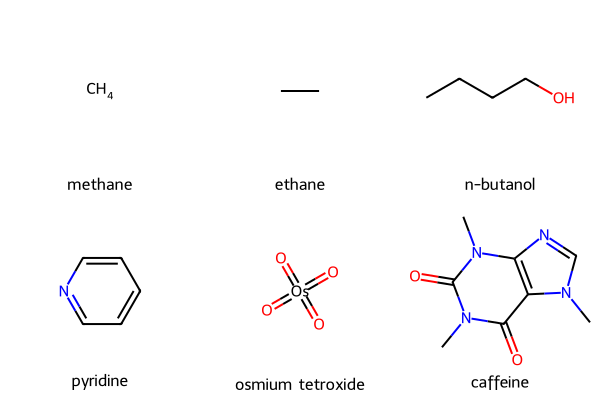

In [3]:
# visualize the molecules
Draw.MolsToGridImage(list(molecules.values()), molsPerRow=3, subImgSize=(200, 200), legends=list(molecules.keys()))

### Molecular descriptors

Molecular descriptors are numerical values derived from a molecule’s chemical structure that quantitatively characterize its properties. They can include simple counts, such as the number of atoms or bonds, as well as more complex topological, geometrical, and electronic properties. molecular descriptors are based on several different theories, such as quantum-chemistry, information theory, organic chemistry, graph theory, and soon, and are used to model several different properties of chemicals in scientiﬁc ﬁelds such as toxicology, analytical chemistry, physical chemistry, and medicinal, pharmaceutical, and environmental chemistry. {Todeschini et al. Molecular Descriptors for Cheminformatics}

**We define molecular descriptor by their representative space:**
**0D descriptors:** constitutional desctriptors, count descriptors. For example, molecular weight, number of heteroatoms etc.

**1D descriptors:** fingerprints (Morgan, ECFP4).

**2D descriptors:** Wiener index, BalabanJ index, Wagner index etc. Most 2D descriptors are graph invariant, meaning they are indifferent of different atoms and bond types (e.g. the connectivity index of acetone and dimethyl sulfoxide are the same). 

**3D descriptors:** Accounts for the 3D topology of the molecules (3D MoRSE and W.H.I.M descriptors). 

**Measured descriptors:** Solubility or LogP. Properties that depends on the molecular structures can be also considered descriptors. However, these are usually sought after and they are hard to calculate. They are usually 0D descriptors

In [4]:
from rdkit.Chem import Descriptors

# Lets calculate 10 different 0D descriptors
def calculate_0D_descriptors(mol):
    descriptors = {
        'Molecular Weight': Descriptors.MolWt(mol),
        'Heavy Atom Count': Descriptors.HeavyAtomCount(mol),
        'Num Hydrogen Donors': Descriptors.NumHDonors(mol),
        'Num Hydrogen Acceptors': Descriptors.NumHAcceptors(mol),
        'Num Rotatable Bonds': Descriptors.NumRotatableBonds(mol),
        'Topological Polar Surface Area': Descriptors.TPSA(mol),
        'LogP': Descriptors.MolLogP(mol),
        'Num Valence Electrons': Descriptors.NumValenceElectrons(mol),
        'Num Aromatic Rings': Descriptors.NumAromaticRings(mol),
        'Num Aliphatic Rings': Descriptors.NumAliphaticRings(mol)
    }
    return descriptors

# Calculate descriptors for each molecule
molecule_descriptors = {name: calculate_0D_descriptors(mol) for name, mol in molecules.items()}

# Lets create a pandas dataframe object from our dict.
df_mols = pd.DataFrame(molecule_descriptors).T
df_mols['smiles'] = list(smiles.values())
df_mols['mol'] = list(molecules.values()) 

# Logging
df_mols.head(6)

,Molecular Weight,Heavy Atom Count,Num Hydrogen Donors,Num Hydrogen Acceptors,Num Rotatable Bonds,Topological Polar Surface Area,LogP,Num Valence Electrons,Num Aromatic Rings,Num Aliphatic Rings,smiles,mol
methane,16.043,1.0,0.0,0.0,0.0,0.00,0.6361,8.0,0.0,0.0,C,<rdkit.Chem.rdchem.Mol object at 0x135a82570>
ethane,30.070,2.0,0.0,0.0,0.0,0.00,1.0262,14.0,0.0,0.0,CC,<rdkit.Chem.rdchem.Mol object at 0x135a83140>
n-butanol,74.123,5.0,1.0,1.0,2.0,20.23,0.7788,32.0,0.0,0.0,CCCCO,<rdkit.Chem.rdchem.Mol object at 0x135a82810>
pyridine,79.102,6.0,0.0,1.0,0.0,12.89,1.0816,30.0,1.0,0.0,c1ccncc1,<rdkit.Chem.rdchem.Mol object at 0x135a82960>
osmium tetroxide,254.226,5.0,0.0,4.0,0.0,68.28,-0.4777,32.0,0.0,0.0,O=[Os](=O)(=O)=O,<rdkit.Chem.rdchem.Mol object at 0x135a81ee0>
caffeine,194.194,14.0,0.0,6.0,0.0,61.82,-1.0293,74.0,2.0,0.0,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,<rdkit.Chem.rdchem.Mol object at 0x135a81d20>


### Ramping up the descriptor calculations

In [ ]:
from mordred import Calculator, descriptors
import pandas as pd

# Lets calculate all 2D descriptors
calc = Calculator(descriptors, ignore_3D=True)

mordred_descriptors = {name: calc(mol) for name, mol in molecules.items()}

mordred_descriptors_dict = {name: desc.asdict() for name, desc in mordred_descriptors.items()}

df_mordred_descriptors = pd.DataFrame.from_dict(mordred_descriptors_dict, orient='index')

df_mordred_descriptors.head(6)

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
methane,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,...,0.000000,1.000000,16.031300,3.206260,0,0,0.0,0.0,divide by zero encountered in power (mZagreb1),0.000000
ethane,0.000000,0.000000,0,0,2.000000,1.000000,2.000000,2.000000,1.000000,1.407606,...,1.098612,7.493061,30.046950,3.755869,1,0,2.0,1.0,2.0,1.000000
n-butanol,2.828427,3.146264,0,0,5.464102,1.732051,3.464102,5.464102,1.092820,2.390167,...,6.192362,25.583106,74.073165,4.938211,20,2,14.0,12.0,2.75,1.500000
pyridine,4.242641,4.000000,0,0,8.000000,2.000000,4.000000,8.000000,1.333333,2.687624,...,7.627057,30.941317,79.042199,7.185654,27,3,24.0,24.0,1.5,1.500000
osmium tetroxide,3.464102,3.464102,0,0,4.000000,2.000000,4.000000,4.000000,0.800000,2.444466,...,7.625107,29.418928,255.941139,51.188228,16,0,20.0,16.0,4.0625,1.000000
caffeine,10.870470,10.470730,0,0,17.668229,2.504977,4.932793,17.668229,1.262016,3.586590,...,9.824498,60.521485,194.080376,8.086682,258,25,76.0,94.0,6.277778,3.027778


<div class="alert alert-block alert-info">
<b>Note:</b> Mordred calculates both 0D, 1D and 2D descriptors (but it also can calcualte 3D desciptors). We will use these descriptors later to perform molecular property predictions.
</div>

<div class="alert alert-block alert-warning">
<b>Important:</b> Descriptors (especially 0D) are always surjective, meaning that the image H and H' of a mapping function f from two molecular graphs G and G' might be the same H=H' (two molecules can have the same molecular weight, but different structure.) 
<br>
<br>
But many of these descriptors can describe a molecule well enough that we differentiate from other molecules. This hypothesis will be one of our basis (similarity conjecture).
</div>

### Fingperprint

Molecular fingerprints are vector type representation of a molecular structure. Common types are bit-string representation (Morgan bits or ECFP fingperprints) but there are exist float-array representations as well. Fingerprint functions are hash-like, but bit-collisions could (and do) happen (more about bit collision here: https://greglandrum.github.io/rdkit-blog/posts/2023-01-23-colliding-bits-iii-expanded.html). 

<div class="alert alert-block alert-info">
<b>Note:</b> The last layer of Graph Neural Network (more on that later) -- or latent representation -- can be also considered a type of fingperprinting. 
</div>

<div class="alert alert-block alert-warning">
<b>Important:</b> In a fingerprint, the molecule's structure is translated into the bit-representation, meaning that each bit has certain structural fragment element (see image below). This deterministic property of fingperprinting allows us to correlate structural elements with their respective importance in an application. 
</div>

![source/images/fingerprints.jpeg](https://www.researchgate.net/profile/Dong-Sheng-Cao/publication/235919348/figure/fig1/AS:299748008448007@1448476902809/Representation-of-a-molecular-substructure-fingerprint-with-a-substructure-fingerprint.png)

In [6]:
# Calculating fingerprints using RDKIt
# Source: https://github.com/rdkit/rdkit-tutorials/blob/master/notebooks/005_Chemical_space_analysis_and_visualization.ipynb
from rdkit import DataStructs

class FP:
    """
    Molecular fingerprint class, useful to pack features in pandas df
    
    Parameters  
    ---------- 
    fp : np.array
        Features stored in numpy array
    names : list, np.array
        Names of the features
    """
    def __init__(self, fp, names):
        self.fp = fp
        self.names = names
    def __str__(self):
        return "%d bit FP" % len(self.fp)
    def __len__(self):
        return len(self.fp)

def get_cfps(mol, radius=2, nBits=1024, useFeatures=False, counts=False, dtype=np.float32):
    """Calculates circular (Morgan) fingerprint.  
    http://rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints  
    
    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
    radius : float 
        Fingerprint radius, default 2
    nBits : int 
        Length of hashed fingerprint (without descriptors), default 1024
    useFeatures : bool  
        To get feature fingerprints (FCFP) instead of normal ones (ECFP), defaults to False
    counts : bool
        If set to true it returns for each bit number of appearances of each substructure (counts). Defaults to false (fingerprint is binary)
    dtype : np.dtype
        Numpy data type for the array. Defaults to np.float32 because it is the default dtype for scikit-learn
    
    Returns
    -------
    ML.FP
        Fingerprint (feature) object
    """
    arr = np.zeros((1,), dtype)
    
    if counts is True:
        info = {}
        fp = AllChem.GetHashedMorganFingerprint(mol, radius, nBits, useFeatures=useFeatures)
        DataStructs.ConvertToNumpyArray(fp, arr)
    else:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return FP(arr, range(nBits))

In [7]:
df_mols['fingperprints'] = [get_cfps(mol) for mol in df_mols['mol']]
print(df_mols['fingperprints'].iloc[0].fp)

[0. 0. 0. ... 0. 0. 0.]


[20:46:48] DEPRECATION WARNING: please use MorganGenerator
[20:46:48] DEPRECATION WARNING: please use MorganGenerator
[20:46:48] DEPRECATION WARNING: please use MorganGenerator
[20:46:48] DEPRECATION WARNING: please use MorganGenerator
[20:46:48] DEPRECATION WARNING: please use MorganGenerator
[20:46:48] DEPRECATION WARNING: please use MorganGenerator


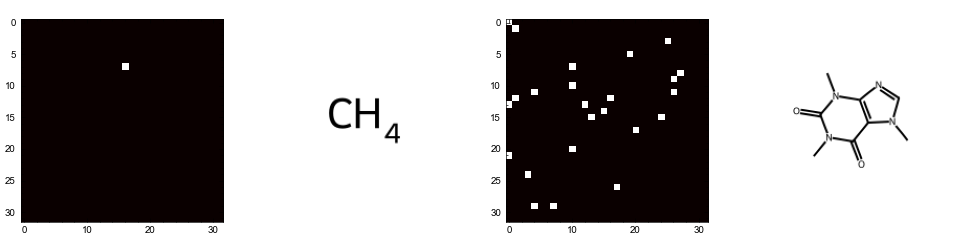

In [ ]:
# Visualize the methane molecule and its fingerprint
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

d2d_caffein_methane = Draw.MolDraw2DCairo(150,100)
d2d_caffein_methane.drawOptions().setBackgroundColour((1,1,1,0))
d2d_caffein_methane.drawOptions().useBWAtomPalette()
d2d_caffein_methane.DrawMolecule(df_mols['mol'].iloc[0])
img_1 = Draw._drawerToImage(d2d_caffein_methane)
imagebox_1 = OffsetImage(np.asarray(img_1), zoom = .75)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 3))
ax1.imshow(df_mols['fingperprints'].iloc[0].fp.reshape(32, 32), cmap='hot', interpolation='nearest')
ab = AnnotationBbox(imagebox_1, (0.5, 0.5), frameon=False)
ax2.add_artist(ab)
ax2.axis('off')

ax3.imshow(df_mols['fingperprints'].iloc[-1].fp.reshape(32, 32), cmap='hot', interpolation='nearest')
d2d_caffein = Draw.MolDraw2DCairo(150,100)
d2d_caffein.drawOptions().setBackgroundColour((1,1,1,0))
d2d_caffein.drawOptions().useBWAtomPalette()
d2d_caffein.DrawMolecule(df_mols['mol'].iloc[-1])
img_2 = Draw._drawerToImage(d2d_caffein)
imagebox_2 = OffsetImage(np.asarray(img_2), zoom = .75)

ab = AnnotationBbox(imagebox_2, (0.5, 0.5), frameon=False)
ax4.add_artist(ab)
ax4.axis('off')
plt.show()

## Using fingerprints and descriptors in molecular predictions

### Quantitative Structure Activity/Property Relationship (QSAR/QSPR)
QSAR/QSPR models uses the molecular structure as features to establish a relation with one or more meassured physicochemcial properties. Common labels (response variables) are solubility, toxicity, melting point, permeability, ADME properties, Tg value, etc. 

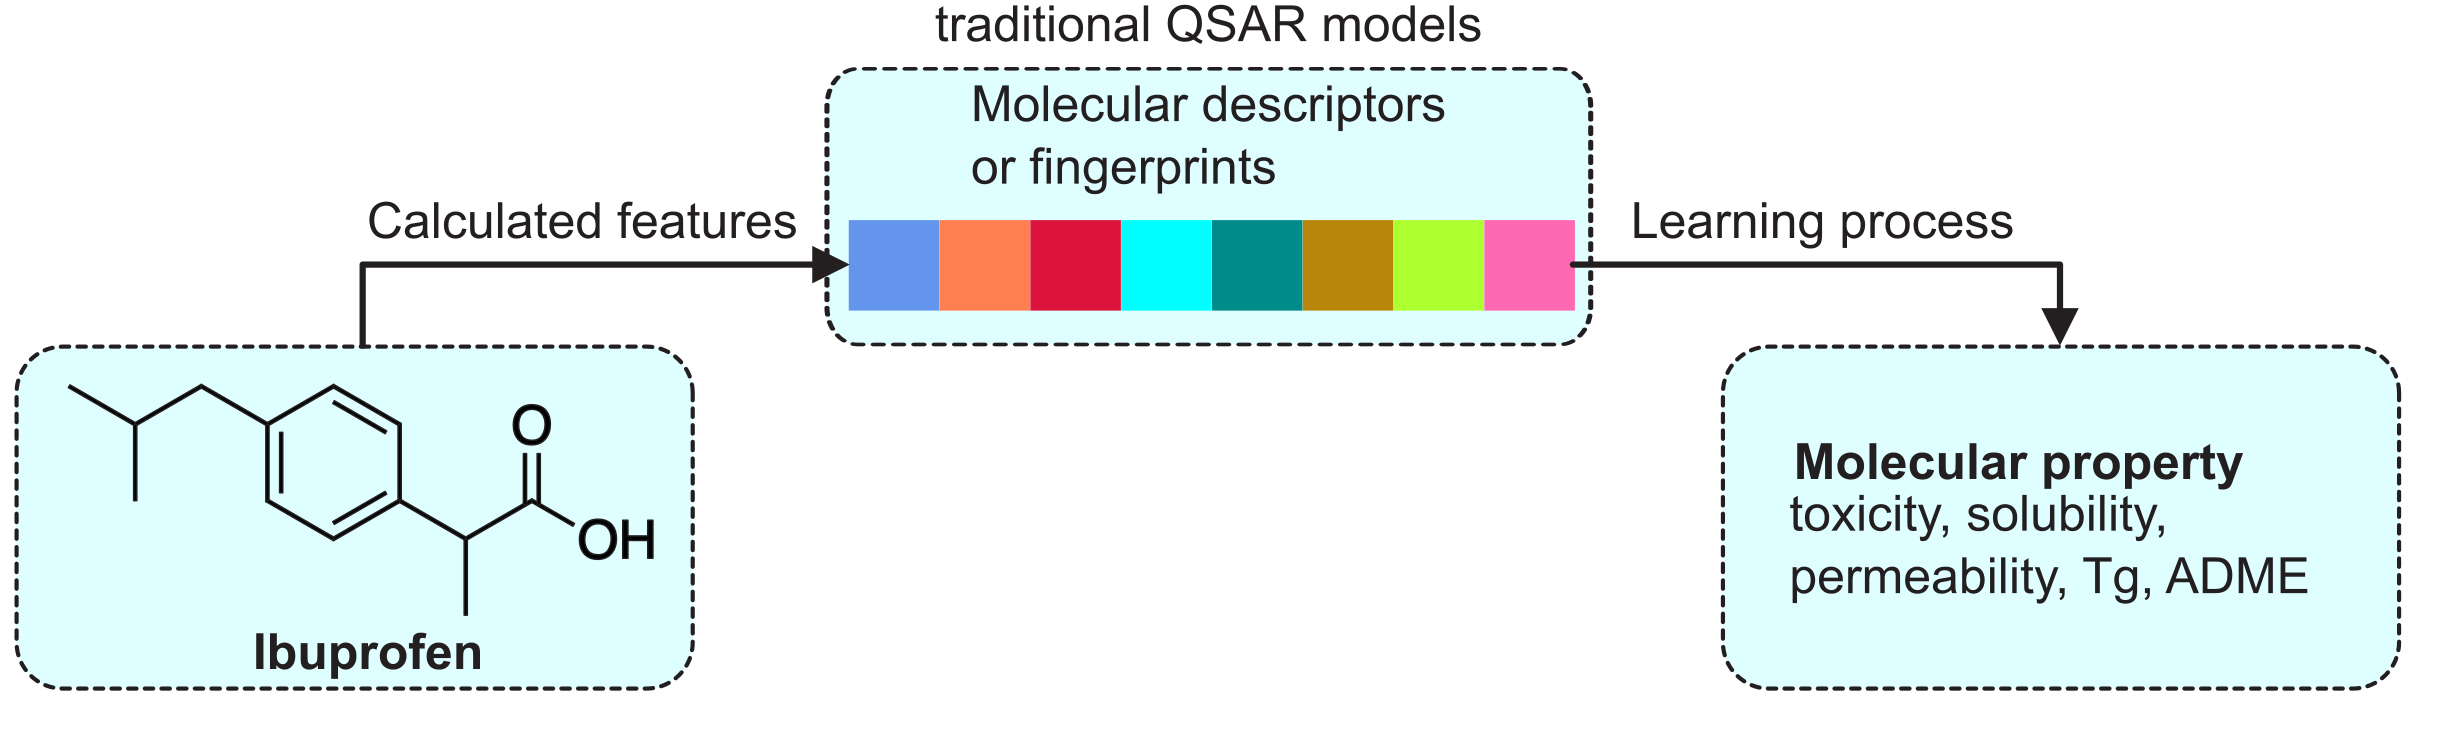

## Regression: prediction water solubility of pharmaceutical molecules

Our first dataset is a water solubility dataset, containing around 1000 measured water solubility for different chemicals. Our task is to predict the measured log solubility (in mols/litre) of each compound, given the molecule structure. 

In [ ]:
df_esol = pd.read_csv('source/datasets/esol.csv', sep=',')
df_esol.head()

,Compound ID,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-1.33,c1ccsc1


<div class="alert alert-block alert-info">
<b>Note:</b> It is always a good idea to visualize both the labels and the features, to ensure that we have a normal distribution (or any other distribution). 
</div>

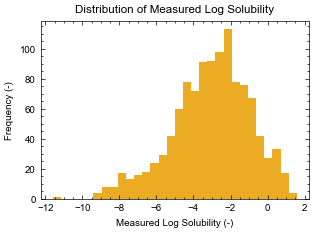

In [10]:
plt.hist(df_esol['measured log solubility in mols per litre'], bins=30)
plt.xlabel('Measured Log Solubility (-)')
plt.ylabel('Frequency (-)')
plt.title('Distribution of Measured Log Solubility')
plt.show()

In [ ]:
# Calculation of molecular descriptors
df_esol['mol'] = [Chem.MolFromSmiles(smile) for smile in df_esol['smiles']]

# Calculation of fingerprints
df_esol['fingerprints'] = [get_cfps(mol) for mol in df_esol['mol']]

# ignore any warning messages if you encounter it (likely on Mac). It is a known bug: https://github.com/rdkit/rdkit/issues/7625

### Data splitting
After data cleaning and preprocessing (which was done for us already, so we don't have to bother with it), the next step is to split the dataset into training, validation, and test sets. The training set is used to fit the machine learning model, while the validation set helps tune hyperparameters and avoid overfitting by providing an unbiased evaluation during model optimization. Finally, the test set is reserved for assessing the model’s performance on unseen data, ensuring that the final evaluation reflects its generalizability. 

If the data is small (and many times it is, especially in natural sciences), data splitting still could introduce undesired uncertainty. To avoid this uncertainty, we can use k-fold crossvaliation. K-fold cross-validation is a resampling technique used to improve the robustness and reliability of model evaluation. In this approach, the dataset is partitioned into k equally sized folds, and the model is trained and validated k times—each time using a different fold as the validation set and the remaining folds as the training set. This method helps us to mitigate the risk of overfitting and provides a more comprehensive assessment of model performance, especially in chemical datasets where data may be limited or highly heterogeneous. By averaging the performance metrics across all folds, we can gain deeper insights into the model’s generalizability, ensuring that the predictions on unseen chemical data are both accurate and reliable.

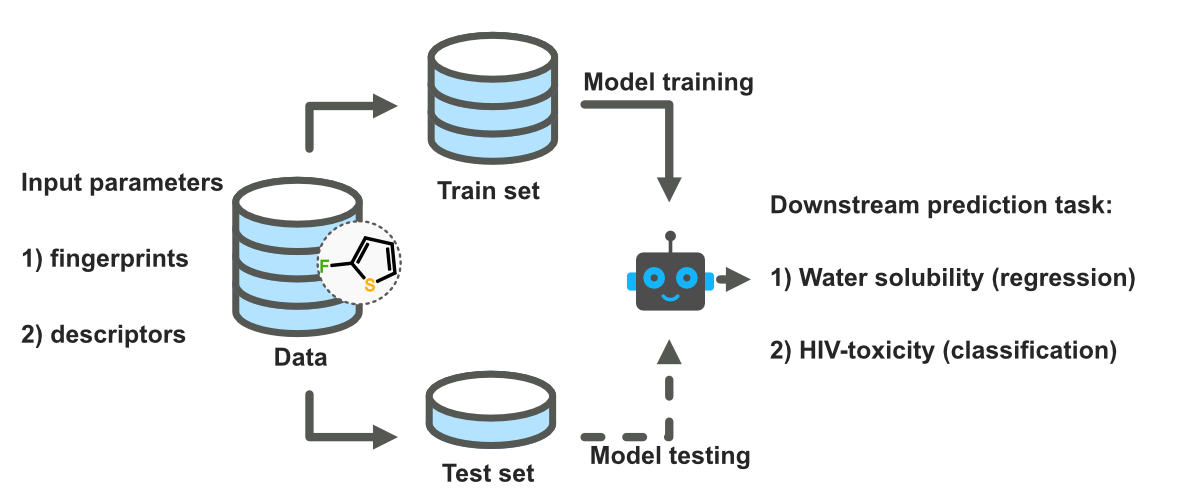

In [12]:
from sklearn.model_selection import train_test_split

# First, we split the data into training (60%), validation (20%), and test (20%) sets.
# We use a relatively large test size to ensure that we have enough data to evaluate the model on. 
val_df, train_df = train_test_split(df_esol, test_size=0.8, random_state=42, shuffle=True)

# Display the sizes of the splits
print(f"Training set size: {len(train_df)}")
print(f"Test set size: {len(val_df)}")

Training set size: 903
Test set size: 225


### Linear regression


So, we have the dataset in hand, with the labels (solubility) and the features (fingerprints). We also know, that the distribution of the labels is somewhat following a normal distribution. Now, we have to make a few assumptions: first, we assume, that the fingerprints are a good representation of their respective molecules without major overlapping (bit collision). Second, we have to assume that any unseen examples (the test set) will be in the same chemical space (more on that later) with the same distribution as our traning set. The second assumption is easy to accept, because we split the data randomly. For the first assumption, we just accept (for now) that the fingerprints are a good representation of any chemical strucutres. 

Now, we are a looking to establish a relationship between the features and the labels. The simples approach is to assume a linear relationship between the input features and the predicted labels. For example:
$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p = \mathbf{x}_i^{\top} \boldsymbol{\beta}+\varepsilon_i
$$

where $\hat{y}$ is our desired predicted water solubility. The $\beta_i x_i$ parts are a weight-feature pair for each feature. $i$ in our case goes from 0 to 1023 which is the total lenght of the features in our dataset. The LHS is the vector notation of the same equation. In our algorithm, we are iteratively looking for the best $\beta_i$ which minimizes the difference between $\hat{y}$ (the predicted value) and $y$ (the measured value). Usually, mean squared error (MSE) is used in linear regression: 

$$
\mathrm{MSE}=\frac{1}{n} \sum_{i=1}^n\left(Y_i-\hat{Y}_i\right)^2
$$

In every iteration step, the MSE is calculated and the weights are updated until a certain treshold value is reached, then the iteration stops.

<div class="alert alert-block alert-warning">
<b>Important: Least squares method and the cost function</b> 
<br>

</div>


We begin by defining the difference (residual) $r_i$ for each observation $i$ as the difference between the observed value $y_i$ and the value predicted by our model $f(x_i, \boldsymbol{\beta})$:
$$
r_i = y_i - f\left(x_i, \boldsymbol{\beta}\right)
$$

The goal is to find the parameter set $\boldsymbol{\beta}$ that makes these residuals as small as possible.
To quantify the overall error, we use the sum of the squared residuals:
$$
S = \sum_{i=1}^n r_i^2
$$

Squaring the residuals serves two purposes: it penalizes larger errors more heavily and ensures that both positive and negative deviations contribute positively to the error measure. This approach is really similar to the L2 norm (Euclidian norm). 

To find the optimal parameters $\boldsymbol{\beta}$ that minimize $S$, we take the derivative of $S$ with respect to each parameter $\beta_j$. This is done by first computing the gradient of $S$:
$$
\frac{\partial S}{\partial \beta_j} = \frac{\partial}{\partial \beta_j} \sum_{i=1}^n \left(y_i - f\left(x_i, \boldsymbol{\beta}\right)\right)^2.
$$

Applying the chain rule ($h^{\prime}=(f \circ g)^{\prime}=\left(f^{\prime} \circ g\right) \cdot g^{\prime}$) for differentiation, we have:
$$
\frac{\partial S}{\partial \beta_j} = 2 \sum_{i=1}^n \left(y_i - f\left(x_i, \boldsymbol{\beta}\right)\right) \left(-\frac{\partial f\left(x_i, \boldsymbol{\beta}\right)}{\partial \beta_j}\right).
$$

Recognizing that $y_i - f(x_i, \boldsymbol{\beta})$ is just $r_i$, the derivative becomes:
$$
\frac{\partial S}{\partial \beta_j} = -2 \sum_{i=1}^n r_i \frac{\partial f\left(x_i, \boldsymbol{\beta}\right)}{\partial \beta_j}.
$$
For minimization, we set this gradient to zero:
$$
-2 \sum_{i=1}^n r_i \frac{\partial f\left(x_i, \boldsymbol{\beta}\right)}{\partial \beta_j} = 0, \quad j=1, \ldots, m.
$$
This set of equations is known as the normal equations. Solving these equations provides the optimal parameter values $\boldsymbol{\beta}$ that minimize the sum of squared errors.



<div class="alert alert-block alert-info">
<b>Note:</b> Since we are squaring the differences, outlying datapoints are driving the cost function more than datapoints with small errors, which could leade to obvious errors.
</div>


**Using the vector form**
The L2 norm is defined as:
$$
S(\boldsymbol{\beta}) = \|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|_2^2.
$$

To find the optimal $\boldsymbol{\beta}$, we set the gradient of  $S(\boldsymbol{\beta})$  with respect to $\boldsymbol{\beta}$ to zero, which yields the normal equations in vector form:

$$
\mathbf{X}^T \mathbf{X} \, \boldsymbol{\beta} = \mathbf{X}^T \mathbf{y}.
$$

If $\mathbf{X}^T \mathbf{X}$ is invertible, the solution is:

$$
\boldsymbol{\beta} = \left(\mathbf{X}^T \mathbf{X}\right)^{-1} \mathbf{X}^T \mathbf{y}.
$$

The assumption about the invertibility of $\mathbf{X}^T \mathbf{X}$ is reasonable, because we expect to $\mathbf{X}$ to be column-independent (the determinant of the matrix is nonzero).

### Putting the code together

In [ ]:
# Lest code-up the linear regression model (but we also add the bias term):

def least_squares(X, y):
    """
    Compute the least squares solution for X * beta = y.
    
    Parameters:
        X (np.ndarray): Design matrix of shape (n_samples, n_features).
        y (np.ndarray): Response vector of shape (n_samples,) or (n_samples, 1).
    
    Returns:
        beta (np.ndarray): Coefficient vector of shape (n_features,).
    """
    XTX = np.dot(X.T, X)
    XTy = np.dot(X.T, y)
    
    if np.linalg.det(XTX) != 0:
        beta = np.dot(np.linalg.inv(XTX), XTy)
    else:
        beta = np.dot(np.linalg.pinv(XTX), XTy)
    
    return beta

Let's preparet the data:
1) splitting the data into test and train (we've already done this).
2) leading the fingerprints to a numpy array.
3) running the optimization
4) predicting on the test set
5) evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# note, we could also code up the mean_squared_error and r2_score functions ourselves, 
# but that would take too much time, so we use the sklearn functions.

# 2) Prepare the training and test data 
X_train = np.array([fp.fp for fp in train_df['fingerprints'].values])
y_train = train_df['measured log solubility in mols per litre'].values

X_val = np.array([fp.fp for fp in val_df['fingerprints'].values])
y_val = val_df['measured log solubility in mols per litre'].values

# 3) Compute the coefficients by running the optimization function (least_squares)
beta = least_squares(X_train, y_train)

# 4) Predict on the test set
y_pred = np.dot(X_val, beta)

# 5) Evaluate the model
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 34.004454997555705
R^2 Score: -7.0160481910230565


<div class="alert alert-block alert-info">
<b>Note:</b> The resulted the R2 is negative, which is really not a good performance. This could be a) we messed up something in the least squares algorithm or b) the data is not linear, meaning that we could not build a linear relationship between the features (x) and the output label (y). First, lets test the a) approach, by invoking the same least squares equation from the sklearn library.
(One could make an alternative c) hyptohesis, that the ESOL dataset is incorrect, but - for now - we must reject this idea, because it is a benchmark dataset and we know, that it should work to some extent.)
</div>

In [ ]:
# most of the common algorithms are already implemented in scikit-learn/pytorch, so we can use them directly.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = np.array([fp.fp for fp in train_df['fingerprints'].values])
y_train = train_df['measured log solubility in mols per litre'].values

X_val = np.array([fp.fp for fp in val_df['fingerprints'].values])
y_val = val_df['measured log solubility in mols per litre'].values

model = LinearRegression(fit_intercept=True) # here, the fit_intercept is True is the same as 
                                             # adding the bias term in our least_squares function.
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 29.80395173965207
R^2 Score: -6.02584156826362


<div class="alert alert-block alert-info">
<b>Note:</b> The imported least_squares function is also performing bad, which indicates that the data might not have linearity in it. The small difference between our implementation and scikit-learn function could be addressed to slightly differnt implementation details, such as a more stable pseudoinverse algorithm (instead of simply doing np.linalg.inv(XTX) like we did). Nonetheless, it is more likely, that we need a non-linear model to test our data.
</div>

### Using a nonlinear approach --> support vector regressor
We saw, that the simplest nonlinear approach did not yield good performance, so lets try a support vector regressor. Support Vector Machines (SVMs) are supervised learning models (just like linear regression) that aim to find a hyperplane that best  fits the data (for regression) by maximizing a margin or minimizing errors under certain constraints. 

In [28]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train the model
svr_model.fit(X_train, y_train)

# Predict on the validation set
y_svr_pred = svr_model.predict(X_val)

# Calculate and print the performance metrics
svr_mse = mean_squared_error(y_val, y_svr_pred)
svr_r2 = r2_score(y_val, y_svr_pred)

print(f"Support Vector Regressor Mean Squared Error: {svr_mse}")
print(f"Support Vector Regressor R^2 Score: {svr_r2}")

Support Vector Regressor Mean Squared Error: 1.2543363677320851
Support Vector Regressor R^2 Score: 0.7043087215420458


The $R^2$ (coefficient of determination) increased while the MSE decreased significantly, meaning that the SVR were able to capture the nonlinearity in the data.

## Unsupervised techniques to reduce dimensions: PCA and t-SNE


### What is a chemical space why is it important?

The chemical space is the collection of all possible molecules, with an estimated number of small carbon-based molecules around $10^{60}$. Moreover, chemical space encompasses every feature of both real and virtual molecular libraries, resulting in a hyperdimensional system. To better understand and visualize chemical space, we can transform graphs into Euclidean space and visualize them in 2D. This is because small organic molecules —- simplified as graphs with atoms as nodes and bonds as edges —- are easier to model as non-Euclidean objects. The assumption here is that the graph’s topology is the primary driving factor behind the properties of the molecules, while the relative positions and angles of atoms and bonds do not substantially alter the final properties. This assumption works well for the majority of molecules, as most exhibit flexibility to some extent through rotatable bonds and vibrating atoms.

Apparent features, such as shape (flat, globular, or V-shaped), functionality (dyes, drug molecules, building blocks, biofuels), and empirical properties (drug-likeness, pKa, or logP) facilitate the understanding of the difference between a set of libraries and their described chemical spaces. Creating, comparing, and visualizing these chemical spaces offer a methodology for understanding the underlying pattern between different molecules or even classes of substances. 

When we calculate molecular fingerprints, we are mapping the molecule’s non-Euclidean graph structure—where atoms and bonds define an irregular topology—into a fixed-length Euclidean vector (or bit vector). This transformation makes it easier to apply standard machine learning algorithms that expect input data in Euclidean space, although we loose some information during the translation. 

In other words, when we calculated the 1024 fingerprints for each molecules, we translated the non-euclidian graph into a 1024 dimensional euclidian space using a lossy hash-like fingerprint function. This 1024 dimensional system is still somewhat challenging for us to visualize. That's where dimension reduction techniques comes into place. 

### Principal component analysis (PCA)

PCA is a so-called linear dimensionality reducion technique, where the data is transformed (linearly) onto a new base while preserving the maximum variance during the transormation. In short, when we perform PCA, we obtain a loading matrix (or eigenvectors) that defines how the original features combine to form the principal components, and a scores matrix (or transformed data) that represents the projection of our data onto these new axes. Each principal component is a weighted combination of the original features. 

We aim to project $N$ datapoints populating a D-dimensional space using a data matrix $\boldsymbol{T}$ into a dimension of $\boldsymbol{L}$ with a data matrix $\boldsymbol{X}$:
$$ 
\boldsymbol{T} \in R^{N \times D} \rightarrow \boldsymbol{X} \in R^{N \times L}
$$
where the $L$-dimensional data matrix $\boldsymbol{X}$ is calculated by applying the linear transformation $\boldsymbol{U}$ on data matrix $\boldsymbol{V}$:
$$
\boldsymbol{X}=\boldsymbol{T} \boldsymbol{U}
$$

In PCA, the linear transformation is performed using matrix $\boldsymbol{U} \in R^{D \times L}$ to minimize an objective function called the reconstruction error (maximizing the variance) from the original data $\boldsymbol{T}$:
$$
E=\left\|T-X U^T\right\|^2
$$

In addition, $L$ corresponds to the number of eigenvalues and eigenvectors with length $D$. The eigenvectors identify the directions of the new variables (principal components) and the eigenvalues indicate the data variance. For PCA, there is no underlying parameter to fine-tune, but the latent variable size can be changed.

The algorithm behind the PCA for real datasets is rather complex, so we will skip it for now. Reading about single value decomposition algorithm that are robust enough to use, can be found here: https://stats.stackexchange.com/questions/66034/what-are-efficient-algorithms-to-compute-singular-value-decomposition-svd/114606#114606

and here: https://en.wikipedia.org/wiki/QR_decomposition

General reading about PCA: https://bryanhanson.github.io/LearnPCA/articles/Vig_06_Math_Behind_PCA.html

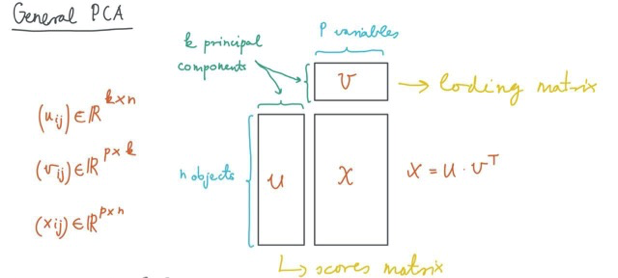

TODO correct grammar error on the image. Correct the loading matrix --> it supposed to be a pxp square matrix.

### Chemical space visualization using PCA

In [31]:
from sklearn.decomposition import PCA

X = np.array([x.fp for x in df_esol['fingerprints']]) # get the fingerprints and create the X matrix for the PCA 

pca = PCA(n_components=3, random_state=0)
pca_esol = pca.fit_transform(X)

df_esol['PC1'] = pca_esol.T[0]
df_esol['PC2'] = pca_esol.T[1]

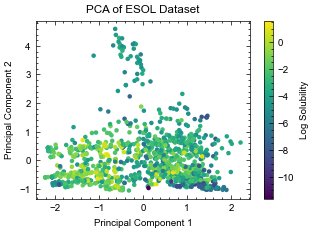

In [ ]:
# Lets create a scatter plot of PC1 vs PC2 with hue for the log solubility
plt.figure()
scatter = plt.scatter(df_esol['PC1'], df_esol['PC2'], c=df_esol['measured log solubility in mols per litre'], cmap='viridis', s=5)
plt.title('PCA of ESOL Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
cbar = plt.colorbar(scatter)
cbar.set_label('Log Solubility')
plt.show()


The visualization is not really informative. But we have learned from the regression studies, is that because our data cannot be explained by simple linear models. But there are ways to perform dimension reduction using non-linear techniques.

### t-Stochastic Neighborhood Embedding (tSNE)

The t-SNE nonlinear dimensional reduction method is useful for defining and separating clusters in a dataset. In stochastic neighborhood embedding, the high-dimensional Euclidian distances are converted into conditional probabilities that represents similarities so that the nearby points have a high probability and farther points have gradually lower probabilities $p_{j \mid i}$:

$$
p_{j \mid i}=\frac{\exp \left(-\left\|x_i-x_j\right\|^2 / 2 x_i^2\right)}{\sum_{k \neq i} \exp \left(-\left\|x_i-x_k\right\|^2 / 2 \sigma_i^2\right)}
$$

where $x_i$ denotes the datapoints and $\sigma$ represents the variance of the dataset. In low-dimensional points, these probabilities must be preserved (similarly to the PCA):
$$
q_{j \mid i}=\frac{\exp \left(-\left\|y_i-y_j\right\|^2\right)}{\sum_{k \neq i} \exp \left(-\left\|y_i-y_k\right\|^2\right)}
$$

where $q_{j \mid i}$ represents the conditional probability in the mapped space, and $y_i$ denotes the datapoints in the new dimension. In stochastic neighborhood embedding and t-SNE, mapping is performed with the aim of determining the points in the low-
dimensional space so that $p_{j \mid i}$ and $q_{j \mid i}$ are equal. In t-SNE, the cost loss function is based on the minimization of the crossentropy loss, more precisely, the Kullback–Leibler divergence:
$$
C=\sum_i K L\left(P_i| | Q_i\right)=\sum_i \sum_j p_{j \mid i} \log \frac{p_{j \mid i}}{q_{j \mid i}}
$$

where $P_i$ and $Q_i$ are conditional probabilities over all other datapoints, given 𝑥𝑖 and 𝑦𝑖 for the original data and the reduced dimensional datapoints, respectively. 

tSNE is an excellent tool to visualize chemical space and is widely used in the literature.

In [43]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=10000)
tsne_esol = model.fit_transform(X) # here, X is the same as it was for the PCA

df_esol['TSNE_C1'] = tsne_esol.T[0]
df_esol['TSNE_C2'] = tsne_esol.T[1]



/Users/gergo/miniforge3/envs/workshop/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


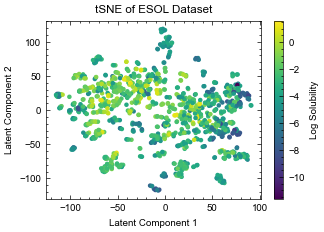

In [44]:
# Lets create a scatter plot of C1 vs C2 with hue for the log solubility
plt.figure()
scatter = plt.scatter(df_esol['TSNE_C1'], df_esol['TSNE_C2'], c=df_esol['measured log solubility in mols per litre'], cmap='viridis', s=5)
plt.title('tSNE of ESOL Dataset')
plt.xlabel('Latent Component 1')
plt.ylabel('Latent Component 2')
cbar = plt.colorbar(scatter)
cbar.set_label('Log Solubility')
plt.show()

Compared to the PCA, the tSNE visualization gives a much better result in terms of clustering molecules into different groups, therefore, capturing the underlying non-linearity in the ESOL dataset. These results are in agreement with our previous linear vs non-linear regression results.